In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/My Drive/SDP'

leaf  Untitled0.ipynb


In [4]:
import os
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

  
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from glob import glob

IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 5s 0us/step


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:

# useful for getting number of output classes
#folders = glob('leaf/train/*')

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [8]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255., rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True )

In [12]:
%cd /content/drive/My Drive/SDP/leaf

/content/drive/My Drive/SDP/leaf


In [13]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 352 images belonging to 5 classes.


In [14]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 56 images belonging to 5 classes.


In [ ]:
%cd /content/drive/My Drive/SDP

In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=500,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/500
11/11 [==============================] - 17s 2s/step - loss: 1.5089 - accuracy: 0.7301 - val_loss: 2.8461 - val_accuracy: 0.6250
Epoch 2/500
11/11 [==============================] - 16s 1s/step - loss: 1.5742 - accuracy: 0.7244 - val_loss: 2.5685 - val_accuracy: 0.6964
Epoch 3/500
11/11 [==============================] - 16s 1s/step - loss: 1.0792 - accuracy: 0.7955 - val_loss: 4.7396 - val_accuracy: 0.5179
Epoch 4/500
11/11 [==============================] - 16s 1s/step - loss: 1.5684 - accuracy: 0.7614 - val_loss: 2.5145 - val_accuracy: 0.6071
Epoch 5/500
11/11 [==============================] - 16s 1s/step - loss: 0.9211 - accuracy: 0.8125 - val_loss: 3.3694 - val_accuracy: 0.6250
Epoch 6/500
11/11 [==============================] - 16s 1s/step - loss: 0.8035 - accuracy: 0.8438 - val_loss: 2.5748 - val_accuracy: 0.6429
Epoch 7/500
11/11 [==============================] - 16s 1s/step - loss: 0.7064 - accuracy: 0.8636 - val_loss: 4.2208 - val_accuracy: 0.5714
Epoch 8/500
1

In [19]:
import matplotlib.pyplot as plt

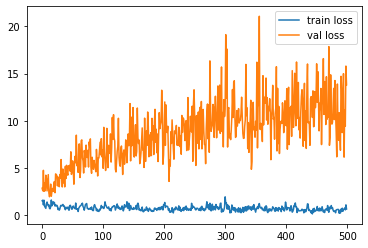

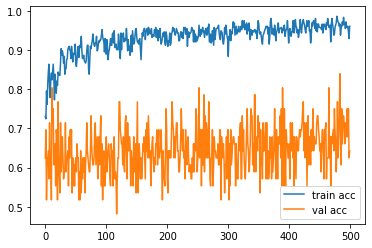

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
model.save('my_model.h5')